In [11]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

<class 'numpy.ndarray'>


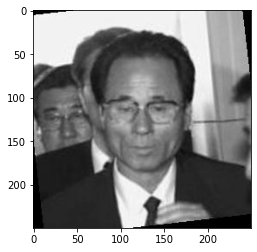

In [10]:
image = cv2.cvtColor(cv2.imread(file_location), cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

In [16]:
def get_face_points(img: np.ndarray):
    """
    Given an image represented in a numpy ndarray, returns a list of lists of tuples.
    Each sublist contains two-member tuples representing x, y positions of each facial point for a face,
    the indices corresponding to the appropiate facial point (see point_map.png).

    Params:
        img: A NumPy ndarray. Must be grayscaled.

    Returns:
        A list of lists of tuples.
    """
     
    face_points = []

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")
    faces = detector(gray_image)

    for face in faces:
        x1 = face.left() # left point
        y1 = face.top() # top point
        x2 = face.right() # right point
        y2 = face.bottom() # bottom point

        landmarks = predictor(image=gray_image, box=face)
        points = []

        # Loop through all the points
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y

            points.append((x, y))

        face_points.append(points)

    return face_points

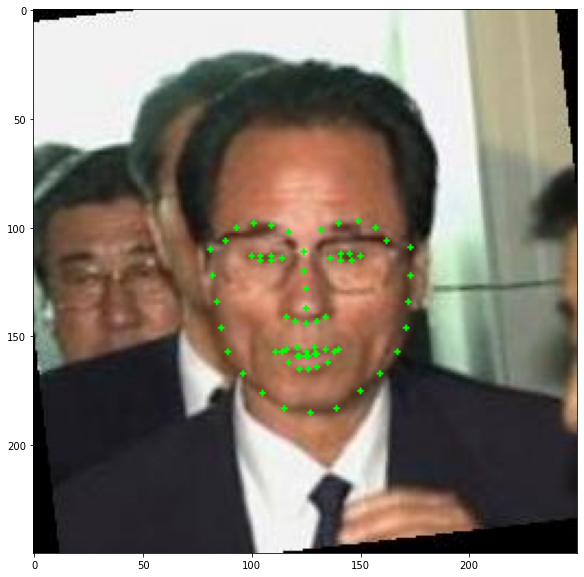

In [17]:
# Visualize points

out_img = np.copy(image)
points = get_face_points(gray_image)

for face in points:
    for x, y in face:
        cv2.circle(img=out_img, center=(x, y), radius=1, color=(0, 255, 0), thickness=-1)

plt.figure(figsize=(10,10))
plt.imshow(out_img, cmap='gray')

In [ ]:
"""
TODO:

- Using get_face_points, block out the appropiate regions of the face with a color.
- Try this on a set of test images (there are some in the folder already).
- Run this on entire Google facial expression dataset (need to maintain the structure to keep information in proper place, dont do this in the repo)
- Try a better method for creating masked faces.
"""
